# SHAP values for categorical features
<br>
<b>Dataset:</b> https://www.kaggle.com/datasets/uciml/mushroom-classification

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import xgboost as xgb

import shap
shap.initjs()

path = "../shap_output/{}"

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
#load data 
# data = pd.read_csv("../data/mushrooms.csv")

# data = pd.read_csv("../data/merged-files/merged-files-final-2022-07-06.csv")
data = pd.read_csv("../data/merged-files/merged-files-final-2023-10-14.csv")

# Delete unnamed / index column
if set(['Unnamed: 0']).issubset(data.columns):
    data = data.drop('Unnamed: 0', axis=1)

data.head()

,extension,CR,location,working_hours,price,const_year,model,L,RR,LR,...,SA,N,H,ME,XE,LGP,XL,3B,4F,MH
0,D,0.0,FI,8973,44900,2011,308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E2,1.0,PL,4183,49040,2016,308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E2,1.0,PL,4655,57943,2017,308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E2,1.0,GB,3175,45335,2015,308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E2,1.0,GB,2500,51222,2018,308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#get features
y = data['price']
print(y.head())

# y = y.astype('category').cat.codes
# print(y.head())
X_cat = data.drop('price', axis=1)


print(len(X_cat))
X_cat.head()

0    44900
1    49040
2    57943
3    45335
4    51222
Name: price, dtype: int64
2996


,extension,CR,location,working_hours,const_year,model,L,RR,LR,GC,...,SA,N,H,ME,XE,LGP,XL,3B,4F,MH
0,D,0.0,FI,8973,2011,308,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E2,1.0,PL,4183,2016,308,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E2,1.0,PL,4655,2017,308,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E2,1.0,GB,3175,2015,308,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E2,1.0,GB,2500,2018,308,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#fit encoder
enc = OneHotEncoder()
enc.fit(X_cat)

#transform categorical features
X_encoded = enc.transform(X_cat).toarray()

#create feature matrix
feature_names = X_cat.columns
new_feature_names = enc.get_feature_names_out(feature_names)

X = pd.DataFrame(X_encoded, columns= new_feature_names)

X

,extension_B,extension_C,extension_D,extension_D2,extension_D3,extension_E,extension_E2,extension_F,extension_G,extension_GC,...,LGP_0.0,LGP_1.0,XL_0.0,XL_1.0,3B_0.0,3B_1.0,4F_0.0,4F_1.0,MH_0.0,MH_1.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2992,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2993,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2994,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [5]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
#Train model
# model = xgb.XGBClassifier(objective="binary:logistic", 
#                          max_depth=2, 
#                         n_estimators=10)

model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)


model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

# print(confusion_matrix(y, y_pred))
# accuracy_score(y, y_pred)

#Get predictions
print(mean_absolute_percentage_error(y, y_pred))

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


171.60943013218642


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


# Standard SHAP values

[07:12:15] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[07:12:18] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


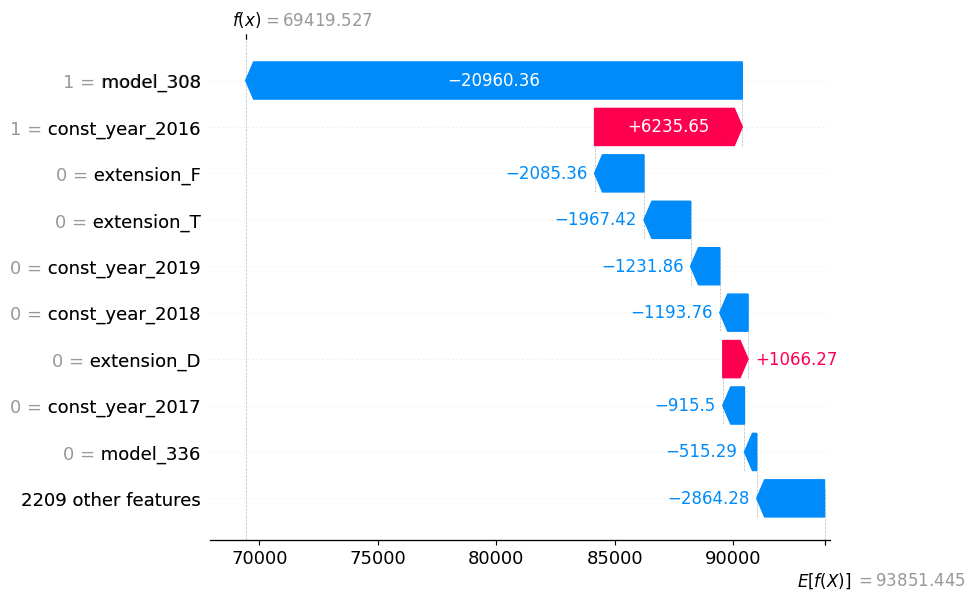

In [6]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# waterfall plot
shap.plots.waterfall(shap_values[1], show=False)
# plt.figure()
plt.savefig(path.format('standard_shap.png'),dpi=100,bbox_inches='tight')

# SHAP for catgeorical features 

In [7]:
print(shap_values)

.values =
array([[    0.     ,   153.78677, -4178.664  , ...,     0.     ,
            0.     ,     0.     ],
       [    0.     ,   314.97653,  1066.2673 , ...,     0.     ,
            0.     ,     0.     ],
       [    0.     ,   295.3852 ,  1272.9773 , ...,     0.     ,
            0.     ,     0.     ],
       ...,
       [    0.     , -8356.877  ,   316.37054, ...,     0.     ,
            0.     ,     0.     ],
       [    0.     ,   210.31656, -5601.702  , ...,     0.     ,
            0.     ,     0.     ],
       [    0.     ,   208.66542, -5422.873  , ...,     0.     ,
            0.     ,     0.     ]], dtype=float32)

.base_values =
array([93851.445, 93851.445, 93851.445, ..., 93851.445, 93851.445,
       93851.445], dtype=float32)

.data =
array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0

In [8]:
print(shap_values.values[1])

[   0.       314.97653 1066.2673  ...    0.         0.         0.     ]


In [9]:
#get number of unique categories for each feature 
n_categories = []
for feat in feature_names[:-1]:
    n = X_cat[feat].nunique()
    n_categories.append(n)
    
n_categories

[19, 2, 35, 2100, 21, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [10]:
new_shap_values = []
for values in shap_values.values:
    
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories))
    
    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)


print(len(new_shap_values),sum(new_shap_values[1]),sum(shap_values.values[1]))
print(new_shap_values[1])

2996 -24431.920527771814 -24431.920527771814
[-3094.980001926422, -210.71445274353027, -388.5407516807318, -605.8787944621872, 1015.2725831270218, -21156.1411151886, 55.68699836730957, 0.0, -4.990131378173828, 13.314454078674316, 0.0, 0.0, -49.4219856262207, 0.0, 0.0, 2.322492837905884, 0.5714741349220276, -1.3101952075958252, -7.111102104187012, 0.0, 0.0]


In [11]:
#replace shap values
shap_values.values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(X_cat)
shap_values.data = np.array(new_data)
# print(shap_values)

#update feature names
shap_values.feature_names = list(X_cat.columns)
print(shap_values)
print(shap_values.feature_names)

.values =
array([[-7.33027593e+03,  4.02071381e+00, -5.28753998e+01, ...,
        -1.15390549e+01,  0.00000000e+00,  0.00000000e+00],
       [-3.09498000e+03, -2.10714453e+02, -3.88540752e+02, ...,
        -7.11110210e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.22421120e+03, -1.41132754e+02, -3.30233604e+02, ...,
        -7.23931408e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.19528735e+04,  3.29681389e+01, -1.44538547e+02, ...,
        -1.15390549e+01,  0.00000000e+00,  0.00000000e+00],
       [-8.02963988e+03,  2.39054492e+01, -5.83521711e+02, ...,
        -1.16010208e+01,  0.00000000e+00,  0.00000000e+00],
       [-7.86659303e+03,  3.28479836e+01,  1.48244552e+02, ...,
        -1.15390549e+01,  0.00000000e+00,  0.00000000e+00]])

.base_values =
array([93851.445, 93851.445, 93851.445, ..., 93851.445, 93851.445,
       93851.445], dtype=float32)

.data =
array([['D', 0.0, 'FI', ..., 0.0, 0.0, 0.0],
       ['E2', 1.0, 'PL', ..., 0.0, 0.0, 0.0],
       ['E2', 1.

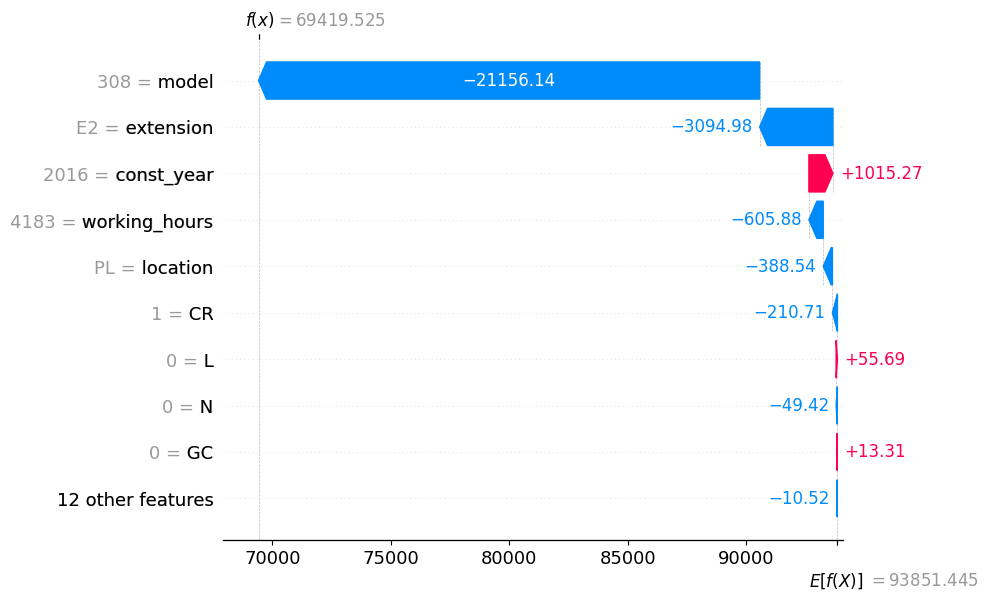

In [12]:
# waterfall plot
plt.figure()
shap.plots.waterfall(shap_values[1], show=False)

plt.savefig(path.format('category_shap.png'),dpi=100,bbox_inches='tight')

In [13]:
#Mean SHAP
plt.figure()
shap.plots.bar(shap_values,show=False)

plt.savefig(path.format('mean_shap.png'),dpi=100,bbox_inches='tight')

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values ,show=False)

plt.savefig(path.format('beeswarm.png'),dpi=100,bbox_inches='tight')

In [15]:
#get shaply values and data
model_values = shap_values[:,"model"].values
model_data = shap_values[:,"model"].data


#split odor shap values based on odor category
model_categories = list(set(model_data))

model_groups = []
for o in model_categories:
    relevant_values = model_values[model_data == o]
    model_groups.append(relevant_values)
    
#replace categories with labels
model_labels = {'1':'308',
               '2':'320', 
               '3':'323', 
               '4':'329', 
               '5':'330', 
               '6':'336', 
               '7':'950', 
               '8':'966',
               '9':'D6', 
               '10':'M318'}

labels = [model_labels[u] for u in model_labels]

#plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(model_groups,labels=labels)

plt.ylabel('Shap values',size=15)
plt.xlabel('Odor',size=15)

plt.savefig(path.format('boxplot.png'),dpi=100,bbox_inches='tight')